In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import seaborn as sns

In [98]:
df = pd.read_csv("housing-prices-dataset/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [99]:
numbers = [f for f in df.columns if df.dtypes[f] != 'object']
list_nums = ', '.join(numbers)
list_nums

'Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice'

In [100]:
string = [f for f in df.columns if df.dtypes[f] == 'object']
list_objects = ', '.join(string)
list_objects

'MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition'

In [101]:
i = 1
for obj in string:
    print(i, "/", obj, "\t",len(df[obj].unique()),":", df[obj].unique())
    i = i+1

1 / MSZoning 	 5 : ['RL' 'RM' 'C (all)' 'FV' 'RH']
2 / Street 	 2 : ['Pave' 'Grvl']
3 / Alley 	 3 : [nan 'Grvl' 'Pave']
4 / LotShape 	 4 : ['Reg' 'IR1' 'IR2' 'IR3']
5 / LandContour 	 4 : ['Lvl' 'Bnk' 'Low' 'HLS']
6 / Utilities 	 2 : ['AllPub' 'NoSeWa']
7 / LotConfig 	 5 : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
8 / LandSlope 	 3 : ['Gtl' 'Mod' 'Sev']
9 / Neighborhood 	 25 : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
10 / Condition1 	 9 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
11 / Condition2 	 8 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
12 / BldgType 	 5 : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
13 / HouseStyle 	 8 : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
14 / RoofStyle 	 6 : ['Gable' 'Hip' 'Gambrel

In [102]:
i = 1
for obj in numbers:
    print(i, "/", obj, "\t",len(df[obj].unique()),":", df[obj].unique())
    i = i+1

1 / Id 	 1460 : [   1    2    3 ... 1458 1459 1460]
2 / MSSubClass 	 15 : [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
3 / LotFrontage 	 111 : [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
4 / LotArea 	 1073 : [ 8450  9600 11250 ... 17217 13175  9717]
5 / OverallQual 	 10 : [ 7  6  8  5  9  4 10  3  1  2]
6 / OverallCond 	 9 : [5 8 6 7 4 2 3 9 1]
7 / YearBuilt 	 112 : [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 19

In [103]:
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd' ]
data = df[features]
data.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9


-Continuous features: LotArea, 1stFlrSF, 2ndFlrSF, YearBuilt

-Categorical features: FullBath, BedroomAbvGr, TotRmsAbvGrd

### One feature interpretion

Continous features:

In [104]:
def one_var_interpret(feature):
    
    plt.figure(figsize = (8,6))
    plt.subplot(1,2,1)
    sns.distplot(feature)
    plt.subplot(1,2,2)
    sns.boxplot(feature)
    plt.show()
    
    mmean = np.mean(feature)
    mmode = stats.mode(feature)
    skewness= stats.skew(feature)
    kurtosis = stats.kurtosis(feature)
    
    return mmean, mmode[0][0], skewness, kurtosis

In [105]:
def outliers(df, feature, isNormal):
    
    if isNormal:
        z_score = stats.zscore(df[feature])
        ouliers = z_score[[(n <= -2.5) or (n >= 2.5) for n in z_score]]
        indexes = [z_score.tolist().index(i) for i in outliers]
        if len(outliers)/len(df) < 0.05:
            df = df.drop(df.index[indexes])
        
    else:
        percentiles = np.array([25, 75])
        x_h = np.percentile(df[feature], percentiles)
        IQR = stats.iqr(df[feature])
        outliers = df[((df[feature] < x_h[0]-1.5*IQR)) | ((df[feature] > x_h[1] + 1.5* IQR))]
        if len(outliers)/ len(df) < 0.05:
            df = df[(df[feature] >=(x_h[0]-1.5*IQR)) & (df[feature] <= (x_h[1] + 1.5*IQR))]
        
    return outliers, df
    

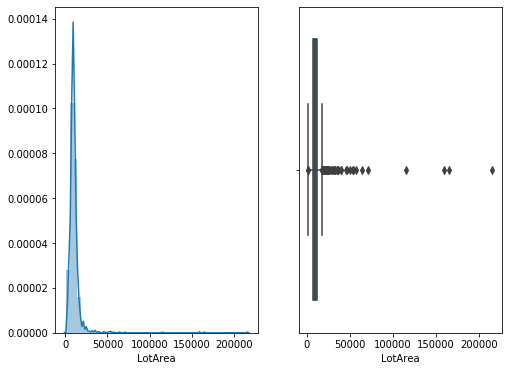

Mean:  10516.828082191782
Mode:  7200
Skewness:  12.195142125084478
Kurtosis:  202.5437927513529


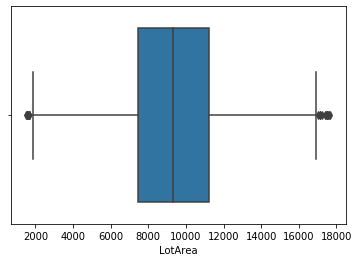

In [106]:
mmean, mmode, skewness, kurtosis = one_var_interpret(data['LotArea'])
print("Mean: ",mmean)
print("Mode: ", mmode)
print("Skewness: ", skewness)
print("Kurtosis: ", kurtosis)
isNormal = False

if abs(skewness) < 0.5:
    isNormal = True
out, data = outliers(data,  'LotArea', isNormal)
sns.boxplot(data['LotArea'])
plt.show()

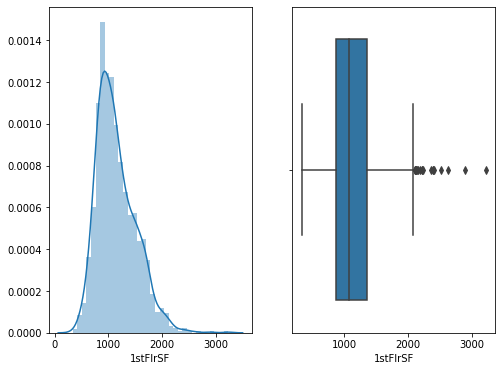

Mean:  1145.1840402588066
Mode:  864
Skewness:  0.912512432133801
Kurtosis:  1.2904676611905863


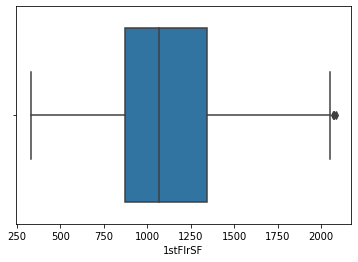

In [107]:
# for 1stFlrSF
mmean, mmode, skewness, kurtosis = one_var_interpret(data['1stFlrSF'])
print("Mean: ",mmean)
print("Mode: ", mmode)
print("Skewness: ", skewness)
print("Kurtosis: ", kurtosis)
isNormal = False

if abs(skewness) < 0.5:
    isNormal = True
out, data = outliers(data,  '1stFlrSF', isNormal)
sns.boxplot(data['1stFlrSF'])
plt.show()

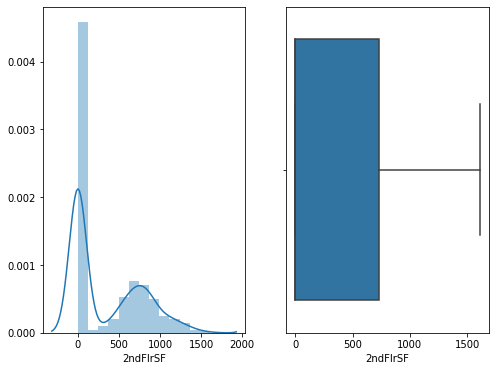

Mean:  341.6268221574344
Mode:  0
Skewness:  0.7325790357627037
Kurtosis:  -0.8778289161178643


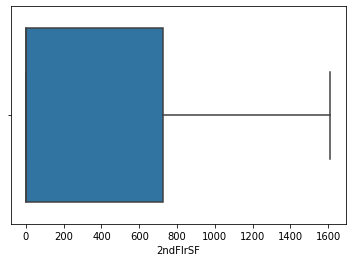

In [108]:
# for 2ndFlrSF
mmean, mmode, skewness, kurtosis = one_var_interpret(data['2ndFlrSF'])
print("Mean: ",mmean)
print("Mode: ", mmode)
print("Skewness: ", skewness)
print("Kurtosis: ", kurtosis)
isNormal = False

if abs(skewness) < 0.5:
    isNormal = True
out, data = outliers(data,  '2ndFlrSF', isNormal)
sns.boxplot(data['2ndFlrSF'])
plt.show()

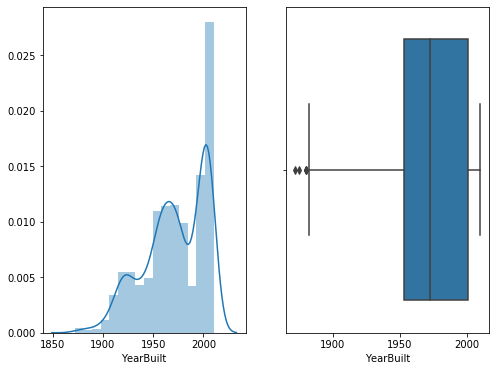

Mean:  1971.354227405248
Mode:  2006
Skewness:  -0.6052906585604442
Kurtosis:  -0.49949110585467515


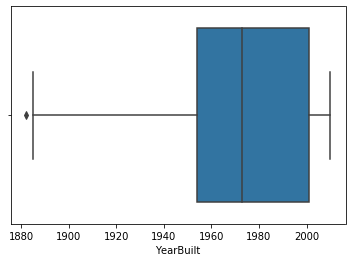

In [109]:
# for YearBuilt
mmean, mmode, skewness, kurtosis = one_var_interpret(data['YearBuilt'])
print("Mean: ",mmean)
print("Mode: ", mmode)
print("Skewness: ", skewness)
print("Kurtosis: ", kurtosis)
isNormal = False

if abs(skewness) < 0.5:
    isNormal = True
out, data = outliers(data,  'YearBuilt', isNormal)
sns.boxplot(data['YearBuilt'])
plt.show()

#### Categorical features : 
- FullBath
- BedroomAbvGr
- TotRmsAbvGrd

In [110]:
data.groupby('FullBath').count()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,BedroomAbvGr,TotRmsAbvGrd
FullBath,,,,,,
0,7,7,7,7,7,7
1,624,624,624,624,624,624
2,713,713,713,713,713,713
3,23,23,23,23,23,23


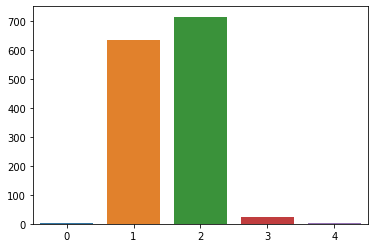

In [111]:
values = [0,1,2,3,4]
freq = [2,634,715,22,4]
sns.barplot(x = values, y = freq)
plt.show()

#### 1 and 2 are two considerable values with total frequency is 1349, while the rest is not.

In [112]:
data.groupby('BedroomAbvGr').count()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,TotRmsAbvGrd
BedroomAbvGr,,,,,,
0,4,4,4,4,4,4
1,45,45,45,45,45,45
2,344,344,344,344,344,344
3,765,765,765,765,765,765
4,182,182,182,182,182,182
5,19,19,19,19,19,19
6,7,7,7,7,7,7
8,1,1,1,1,1,1


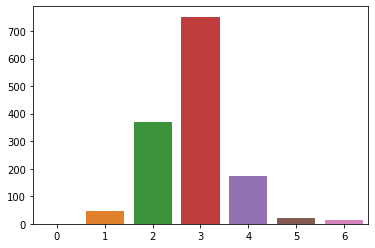

In [113]:
sns.barplot(x = [0,1,2,3,4,5,6], y = [1,47,370,752,173,21, 13])
plt.show()

##### The frequency of value 3 is greater than the half of total frequency. And the values are mostly in the interval [2,4].

In [114]:
data.groupby('TotRmsAbvGrd').count()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr
TotRmsAbvGrd,,,,,,
2,1,1,1,1,1,1
3,16,16,16,16,16,16
4,93,93,93,93,93,93
5,265,265,265,265,265,265
6,392,392,392,392,392,392
7,307,307,307,307,307,307
8,170,170,170,170,170,170
9,64,64,64,64,64,64
10,36,36,36,36,36,36


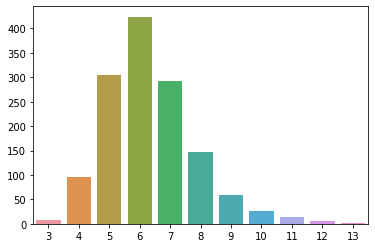

In [115]:
sns.barplot(x = [3,4,5,6,7,8,9,10,11,12,13], y = [8, 95,305,424,293,147,59,27,13,5,1])
plt.show()

###### The values are mostly in the interval [4,9].

### Two variables interpretion:

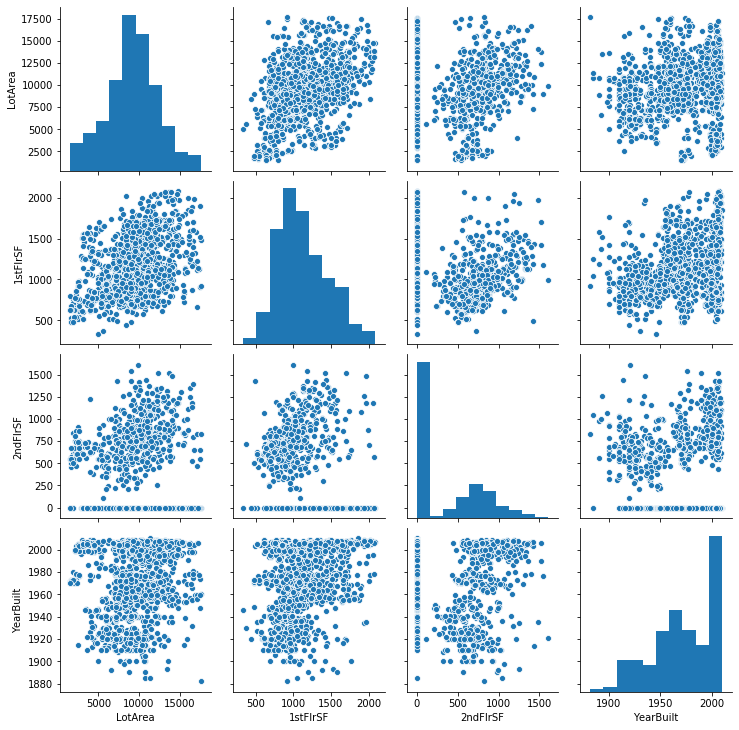

In [116]:
continous = data[['LotArea','1stFlrSF','2ndFlrSF','YearBuilt']]
sns.pairplot(continous)
plt.show()

In [117]:
data['LotArea'].corr(data['YearBuilt'], method = 'spearman')

0.12671999686626456

In [118]:
data['LotArea'].corr(data['1stFlrSF'], method = 'spearman')

0.40423298525103535

In [119]:
data['LotArea'].corr(data['2ndFlrSF'], method = 'spearman')

0.12073596270762171

In [120]:
data['YearBuilt'].corr(data['2ndFlrSF'], method = 'spearman')

0.03183909812886775

In [121]:
data['YearBuilt'].corr(data['1stFlrSF'], method = 'spearman')

0.3179498013444452

In [122]:
data['1stFlrSF'].corr(data['2ndFlrSF'], method = 'spearman')

-0.29360770448565543

###### Almost pairs of features are in increasing monotonic relationships, instead of (1stFlrSF, 2ndFlrSF).

In [123]:
def chi2_test(table):
    stat, p, dof, expected = stats.chi2_contingency(table)
    alpha = 0.05
    critical = stats.chi2.ppf(1-alpha, dof)
    print("P-value: ", p)
    print("Degree of freedom ", dof)
    print("Statistic: ", stat)
    print("Critical value: ", critical)
    if p <= 0.05:
        print("Reject H0")
    else:
        print("Fail to reject H0")

In [124]:
table1 = pd.crosstab(data['FullBath'], data['BedroomAbvGr'])
table2 = pd.crosstab(data['FullBath'], data['TotRmsAbvGrd'])
table3 = pd.crosstab(data['BedroomAbvGr'], data['TotRmsAbvGrd'])

In [125]:
chi2_test(table1)

P-value:  1.6751761531003457e-120
Degree of freedom  21
Statistic:  633.1620760450365
Critical value:  32.670573340917315
Reject H0


In [126]:
chi2_test(table2)

P-value:  4.199744511959759e-111
Degree of freedom  33
Statistic:  628.084578314431
Critical value:  47.39988391908093
Reject H0


In [127]:
chi2_test(table3)

P-value:  0.0
Degree of freedom  77
Statistic:  2980.3567766575165
Critical value:  98.48438345934042
Reject H0


##### Conclusion: Three variables are dependent.
           
           

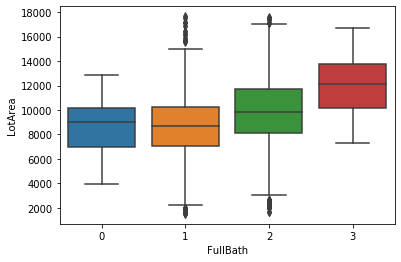

In [128]:
sns.boxplot(x = data['FullBath'], y = data['LotArea'])
plt.show()

In [141]:
# Anova test:
grouping_data = data[['FullBath','LotArea']]
grouping_data.head()

,FullBath,LotArea
0,2,8450
1,2,9600
2,2,11250
3,1,9550
4,2,14260


In [142]:
group1 = grouping_data[grouping_data['FullBath'] == 1]
group2 = grouping_data[grouping_data['FullBath'] == 2]
group3 = grouping_data[grouping_data['FullBath'] == 3]
group4 = grouping_data[grouping_data['FullBath'] == 4]
group0 = grouping_data[grouping_data['FullBath'] == 0]

In [143]:
fvalue, pvalue = stats.f_oneway(group1['LotArea'], group2['LotArea'],group3['LotArea'], group4['LotArea'], group0['LotArea'])
print(fvalue, pvalue)
if pvalue > 0.05:
    print("Failed to reject H0")
else:
    print('Reject H0')

nan nan
Reject H0


D:\Anaconda\lib\site-packages\scipy\stats\stats.py:3339: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)


In [144]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [133]:
model = ols('LotArea ~ C(FullBath)', data=grouping_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(FullBath),5.891217e+08,3.0,20.280449,7.355302e-13
Residual,1.319781e+10,1363.0,NaN,NaN


In [134]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=grouping_data['LotArea'], 
                           groups=grouping_data['FullBath'], 
                           alpha=0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     0      1   14.1193    0.9 -3028.0541 3056.2927  False
     0      2  1094.768 0.7653 -1945.2984 4134.8343  False
     0      3 3547.0373 0.0416    91.9558 7002.1187   True
     1      2 1080.6487  0.001   641.8764  1519.421   True
     1      3  3532.918  0.001  1833.4753 5232.3607   True
     2      3 2452.2693 0.0012   756.6013 4147.9373   True
----------------------------------------------------------


The majority of pairs of groups are failed to reject H0. So that there are some significant differences in the figures.

In [135]:
w, pvalue = stats.shapiro(model.resid)
print(pvalue)
alpha = 0.05
if (pvalue > 0.05):
    print("Failed to reject H0. Data is normal distribution.")
else:
    print("Reject H0. Data is not normal distribution.")

1.2839124208241515e-09
Reject H0. Data is not normal distribution.


In [136]:
w, pvalue = stats.levene(group1['LotArea'], group2['LotArea'], group3['LotArea'], group4['LotArea'], group0['LotArea'])
print(pvalue)
alpha = 0.05
if (pvalue > 0.05):
    print("Failed to reject H0. The variances are homogeneous.")
else :
    print("Reject H0. The variances are not homogeneous.")

nan
Reject H0. The variances are not homogeneous.


D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
D:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
D:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [137]:
# Checking for Nan data:
containing_null = data.isnull().values.any()

if (containing_null):
    print("There are null values in dataset.")
else :
    print("There are no null values.")

There are no null values.


In [138]:
data.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9


In [139]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [145]:
data['SalePrice'] = df['SalePrice']

In [146]:
data.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
0,8450,2003,856,854,2,3,8,208500
1,9600,1976,1262,0,2,3,6,181500
2,11250,2001,920,866,2,3,6,223500
3,9550,1915,961,756,1,3,7,140000
4,14260,2000,1145,1053,2,4,9,250000


In [148]:
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X_train, X_test, y_train, y_test = train_test_split(data[features], data['SalePrice'], test_size = 0.2, random_state = 0)

In [149]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
coeff_df = pd.DataFrame(regressor.coef_, features, columns =['Coefficent'])

In [152]:
coeff_df

,Coefficent
LotArea,2.884673
YearBuilt,891.677056
1stFlrSF,127.121710
2ndFlrSF,89.843285
FullBath,-5489.796279
BedroomAbvGr,-20296.618172
TotRmsAbvGrd,2303.290971


In [153]:
y_predict = regressor.predict(X_test)

In [157]:
comparison = pd.DataFrame({'Actual ': y_test, "Prediction ": y_predict})
comparison.head()

,Actual,Prediction
1102,135000,148235.982978
1150,124000,112726.427076
633,139400,119164.324411
31,149350,149692.803756
147,222500,242470.210225


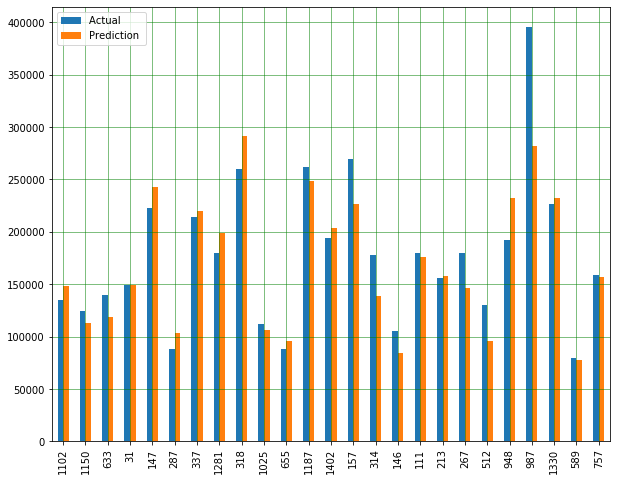

In [161]:
comparison.head(25).plot(kind = 'bar', figsize = (10,8))
plt.grid(which ='major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()

In [162]:
from sklearn import metrics

In [164]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Root Mean Squared Error: 34039.09985861215
